In [215]:
import seaborn as sns
from datetime import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 2000)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat

import matplotlib.pyplot as plt

In [4]:
sns.get_dataset_names()

c:\users\mital\appdata\local\programs\python\python36\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file c:\users\mital\appdata\local\programs\python\python36\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="html5lib"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [57]:
df = sns.load_dataset("flights")

In [58]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [16]:
import matplotlib.pyplot as plt

In [27]:
df_by_year = df.groupby('year').passengers.sum().reset_index()

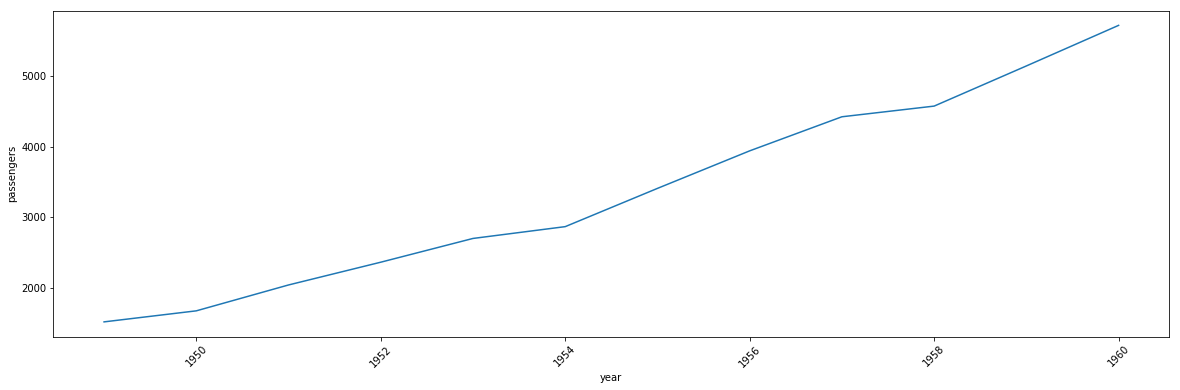

In [29]:
plt.figure(figsize=(20,6))
sns.lineplot(x='year', y='passengers', data=df_by_year)
plt.xticks(rotation=45)
plt.show()

In [30]:
df_by_month = df.groupby('month').passengers.sum().reset_index()

In [60]:
df['month_yr'] = df.apply(lambda x: datetime.strptime(x['month'] + '-' + str(x['year']),"%B-%Y"), axis=1)

In [61]:
df.head()

,year,month,passengers,month_yr
0,1949,January,112,1949-01-01
1,1949,February,118,1949-02-01
2,1949,March,132,1949-03-01
3,1949,April,129,1949-04-01
4,1949,May,121,1949-05-01


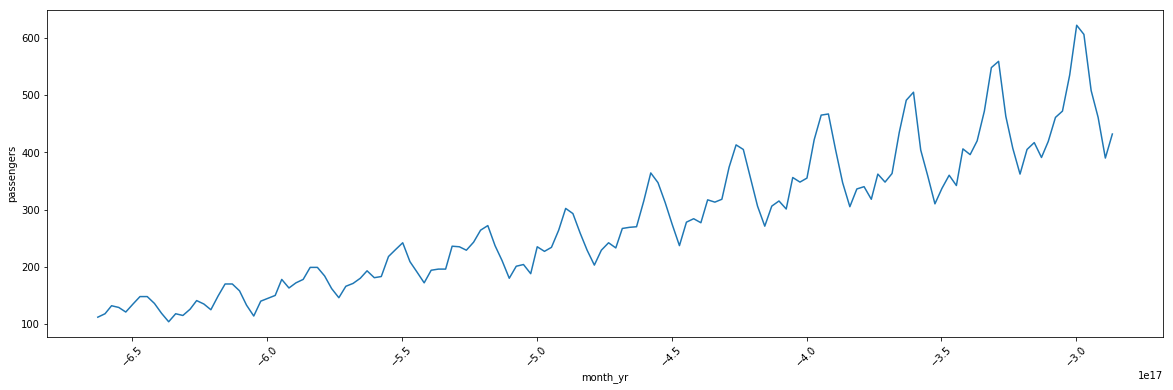

In [65]:
plt.figure(figsize=(20,6))
sns.lineplot(x='month_yr', y='passengers', markers=True, data=df)
plt.xticks(rotation=45)
plt.show()

In [171]:
df_by_month['month_dt'] = df_by_month.apply(lambda x: datetime.strptime(x['month'],"%B"), axis=1)

In [172]:
df_by_month.head()

,month,passengers,month_dt,y_lag_10
0,January,2901,1900-01-01,d
1,February,2820,1900-02-01,d
2,March,3242,1900-03-01,d
3,April,3205,1900-04-01,d
4,May,3262,1900-05-01,d


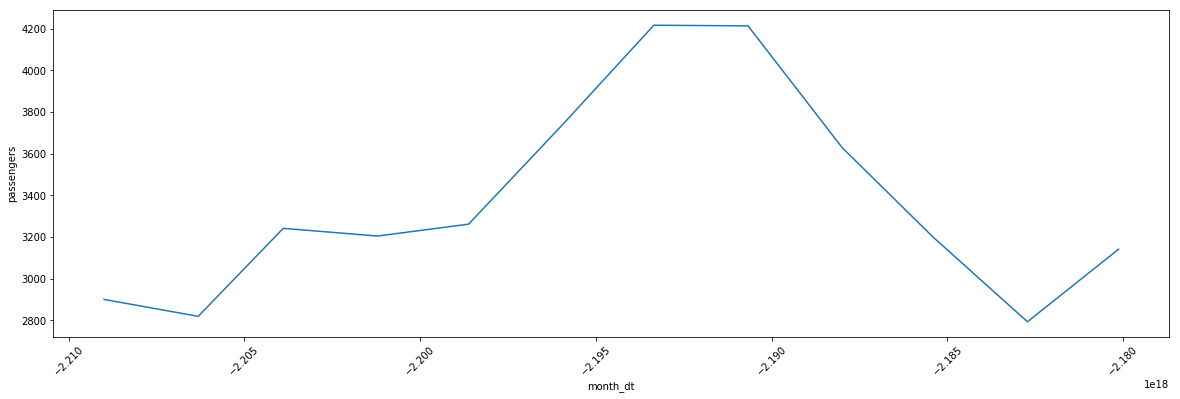

In [46]:
plt.figure(figsize=(20,6))
sns.lineplot(x='month_dt', y='passengers', data=df_by_month)
plt.xticks(rotation=45)
plt.show()

In [76]:
df.set_index(df['month_yr'], drop=True, inplace=True)

In [70]:
import pandas as pd

In [73]:
df.index = pd.to_datetime(df.index)
y = df["passengers"]

In [79]:
df.drop(columns=['month', 'month_yr', 'year'], inplace=True)

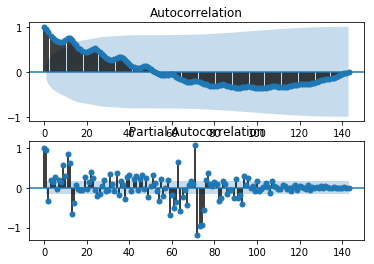

In [88]:
fig, ax = plt.subplots(2, 1)

plt.figure(figsize=(10,8))

plot_acf(df, ax=ax[0])
plot_pacf(df, ax=ax[1], method="ols")
plt.show()

In [90]:
acf(df, nlags=10)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

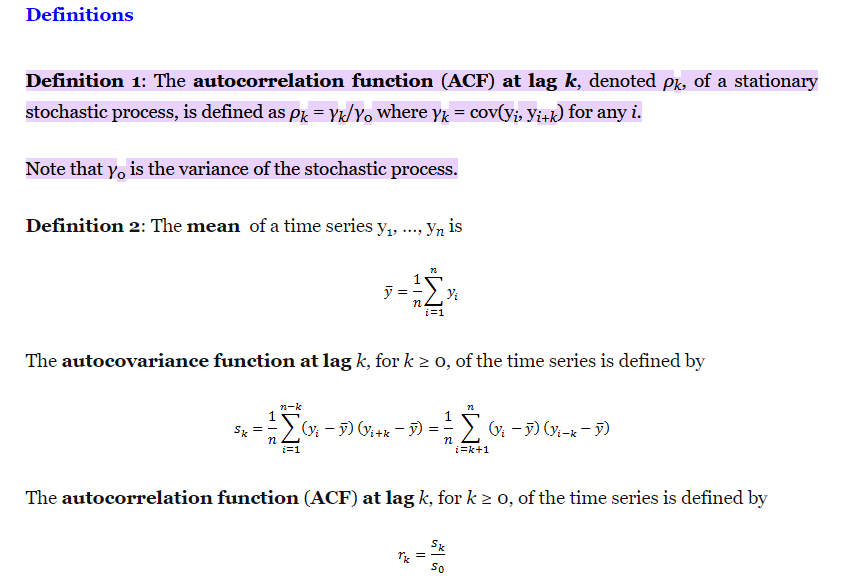

In other words:-

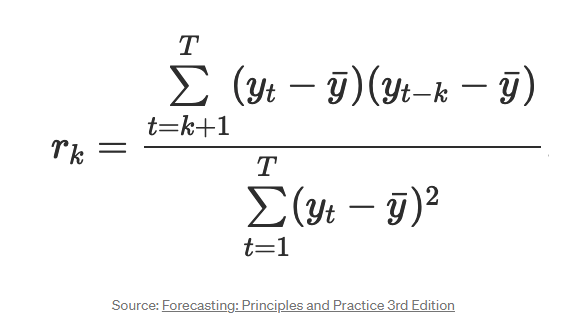

In [93]:
y_bar = df.passengers.mean()
y_bar

280.2986111111111

In [144]:
y_i = df.passengers

In [145]:
n = len(y_i)
n

144

In [159]:
import math as m

In [198]:
max_k = 140

In [199]:
acf_list = []

for k in range(0,max_k):
    acf_list.append(sum((y_i[i] - y_bar) * (y_i[i-k] - y_bar) for i in range(k+1, n))/sum(pow((y_i[i] - y_bar),2) for i in range(1,n)))


In [201]:
acf_list[0:10]

[1.0,
 0.9478198524961128,
 0.8754968446941315,
 0.8053930130044767,
 0.7499195981594656,
 0.7116827720921524,
 0.6802772634072141,
 0.6611852876574001,
 0.6527945943400135,
 0.6669368833108728]

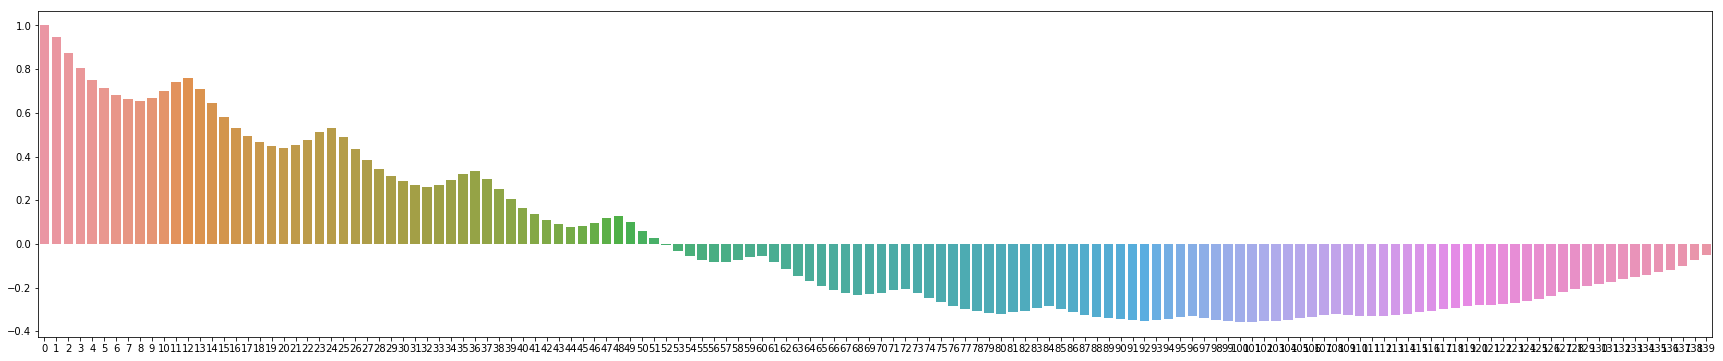

In [218]:
plt.figure(figsize=(30,6))
sns.barplot(x=list(range(0,max_k)), y=acf_list)